In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special, optimize

from infohdp.generators import gen_prior_pij, gen_prior_pij_t, gen_samples_prior, gen_samples_prior_t
from infohdp.core import entropy_true, mutual_information_true
from infohdp.utils import count_nxy_multiclass
from infohdp.estimators import NaiveEstimator, NSBEstimator, BinaryInfoHDPEstimator, MulticlassInfoHDPEstimator, BinaryFullInfoHDPEstimator, MulticlassFullInfoHDPEstimator

# Or import the whole package as "import infohdp"

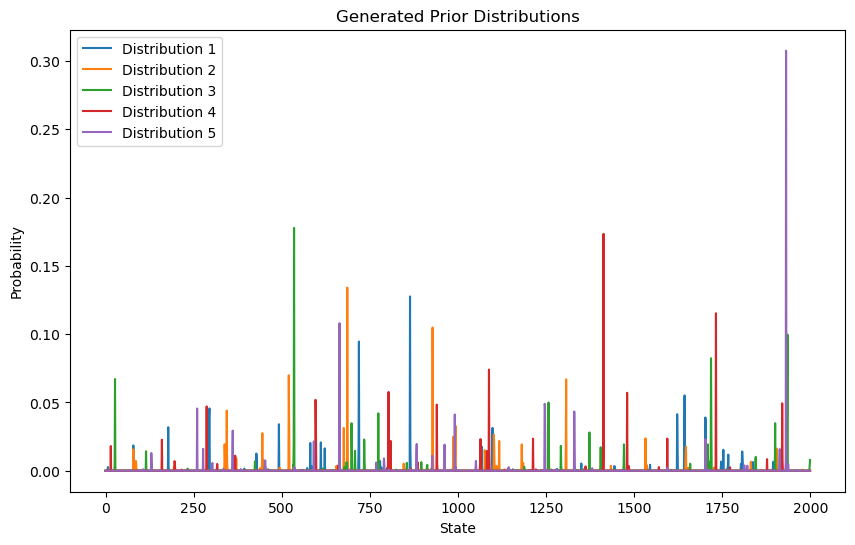

In [2]:
# Set the seed
np.random.seed(1)

# Example 1: Generate prior pij, binary case
alpha = 10.0
beta = 0.5
ndist = 5
Ns = 1000

pij = gen_prior_pij(alpha, beta, ndist, Ns)

plt.figure(figsize=(10, 6))
for i in range(ndist):
    plt.plot(pij[i], label=f'Distribution {i+1}')
plt.title('Generated Prior Distributions')
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend()
plt.show()


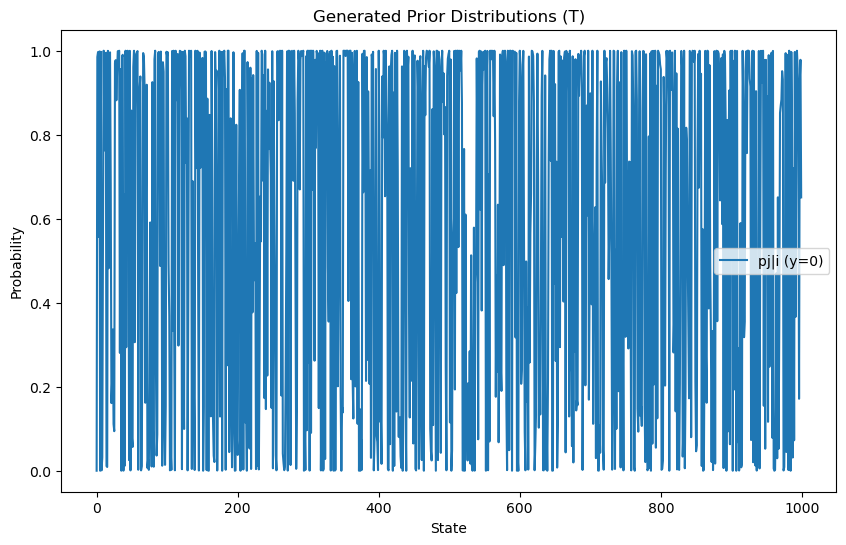

In [3]:
# Example 2: Generate prior pij_t, multiclass case
qy = [0.6, 0.3, 0.1]  # Example marginal distribution for Y
pi, pjdadoi, pij_t = gen_prior_pij_t(alpha, beta, qy, Ns)

plt.figure(figsize=(10, 6))
plt.plot(pjdadoi[:, 0], label='pj|i (y=0)')
plt.title('Generated Prior Distributions (T)')
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [4]:
# Set the seed
np.random.seed(1)

print(pij[0].shape)

print(f"True entropy: {entropy_true(pij[0]):.2f}")
print(f"True mutual information: {mutual_information_true(pij[0]):.2f}")

M = 50
samples = gen_samples_prior(pij[0], M, Ns)

# Create instances of Estimators for binary case
naive_estimator = NaiveEstimator()
nsb_estimator = NSBEstimator()
ihdp_estimator = BinaryInfoHDPEstimator()
ihdpfull_estimator = BinaryFullInfoHDPEstimator()

print(f"Naive entropy: {naive_estimator.estimate_entropy(samples):.2f}")
s_nsb, ds_nsb = nsb_estimator.estimate_entropy(samples)
print(f"NSB entropy: {s_nsb:.2f} ± {ds_nsb:.2f}")

print(f"Naive info: {naive_estimator.estimate_mutual_information(samples):.4f}")
i_nsb, di_nsb = nsb_estimator.estimate_mutual_information(samples)
print(f"NSB info: {i_nsb:.4f} ± {di_nsb:.4f}")
print(f"Ihdp info: {ihdp_estimator.estimate_mutual_information(samples):.4f}")

i_hdp, di_hdp = ihdpfull_estimator.estimate_mutual_information(samples)
print(f"Ihdp full info: {i_hdp:.4f} ± {di_hdp:.4f}")

(2000,)
True entropy: 3.62
True mutual information: 0.22
Naive entropy: 2.98
NSB entropy: 3.53 ± 0.22
Naive info: 0.5803
NSB info: 0.5839 ± 0.3183
Ihdp info: 0.4938
Ihdp full info: 0.4857 ± 0.0799


In [5]:
import pandas as pd

dfp = pd.DataFrame(pij[0])
dfs = pd.DataFrame(samples)

# Save to CSV to compare with Mathematica package
dfp.to_csv('data_mathe/pij0.csv', index=False, header=False)
dfs.to_csv('data_mathe/samples0.csv', index=False, header=False)

In [6]:
print(pij_t.shape)

print(f"True entropy: {entropy_true(pij_t):.4f}")

# Set the seed
np.random.seed(1)
M = 50
samples_t = gen_samples_prior_t(pi,pjdadoi, M, Ns)

# Create instances of Estimators for multiclass case
naive_estimator = NaiveEstimator()
nsb_estimator = NSBEstimator()
ihdpt_estimator = MulticlassInfoHDPEstimator()
ihdpfull_estimator = MulticlassFullInfoHDPEstimator()

print(f"Naive entropy: {naive_estimator.estimate_entropy(samples_t):.4f}")
s_nsb, ds_nsb = nsb_estimator.estimate_entropy(samples_t)
print(f"NSB entropy: {s_nsb:.4f} ± {ds_nsb:.4f}")

print(f"True mutual information: {mutual_information_true(pij_t):.4f}")
print(f"Naive info: {naive_estimator.estimate_mutual_information(samples_t):.4f}")
i_nsb, di_nsb = nsb_estimator.estimate_mutual_information(samples_t)
print(f"NSB info: {i_nsb:.4f} ± {di_nsb:.4f}")
print(f"Ihdp(MAP)T info: {ihdpt_estimator.estimate_mutual_information(samples_t):.4f}")

i_hdp, di_hdp = ihdpfull_estimator.estimate_mutual_information(samples_t)
print(f"Ihdp full multiclass info: {i_hdp:.4f} ± {di_hdp:.4f}")


(1000, 3)
True entropy: 3.2494
Naive entropy: 2.5806
NSB entropy: 2.8732 ± 0.1771
True mutual information: 0.6506
Naive info: 0.7326
NSB info: 0.7274 ± 0.2628
Ihdp(MAP)T info: 0.6864
Ihdp full multiclass info: 0.6818 ± 0.0602


In [7]:
import pandas as pd

dfpt = pd.DataFrame(pij_t)
dfst = pd.DataFrame(samples_t)

# Save to CSV to compare with Mathematica package
dfpt.to_csv('data_mathe/pij_t.csv', index=False, header=False)
dfst.to_csv('data_mathe/samples_t.csv', index=False, header=False)